## Dependencies



In [55]:
import numpy as np
import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette("bright", 8))

In [56]:
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score,balanced_accuracy_score


from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
from get_image_data_tabular import *
from pprint import pprint
import time

Extract features from image dataset using a pretrained convnet

In [57]:
features, labels = get_img_training_data(Path('imagenette2-320')/'train')

 11%|█████████                                                                          | 8/73 [00:07<01:01,  1.06it/s]

imagenette2-320\train\n02102040\n02102040_1408.JPEG


 12%|██████████▏                                                                        | 9/73 [00:08<00:59,  1.07it/s]

imagenette2-320\train\n02102040\n02102040_173.JPEG
imagenette2-320\train\n02102040\n02102040_2149.JPEG


 14%|███████████▏                                                                      | 10/73 [00:09<00:59,  1.06it/s]

imagenette2-320\train\n02102040\n02102040_3183.JPEG
imagenette2-320\train\n02102040\n02102040_3575.JPEG


 16%|█████████████▍                                                                    | 12/73 [00:11<00:57,  1.06it/s]

imagenette2-320\train\n02102040\n02102040_5376.JPEG
imagenette2-320\train\n02102040\n02102040_598.JPEG


 18%|██████████████▌                                                                   | 13/73 [00:12<00:56,  1.07it/s]

imagenette2-320\train\n02102040\n02102040_725.JPEG


 19%|███████████████▋                                                                  | 14/73 [00:13<00:55,  1.07it/s]

imagenette2-320\train\n02102040\n02102040_7646.JPEG


 21%|████████████████▊                                                                 | 15/73 [00:14<00:54,  1.06it/s]

imagenette2-320\train\n02979186\ILSVRC2012_val_00006787.JPEG
imagenette2-320\train\n02979186\n02979186_10755.JPEG


 23%|███████████████████                                                               | 17/73 [00:16<00:53,  1.05it/s]

imagenette2-320\train\n02979186\n02979186_13764.JPEG
imagenette2-320\train\n02979186\n02979186_14758.JPEG
imagenette2-320\train\n02979186\n02979186_15188.JPEG
imagenette2-320\train\n02979186\n02979186_1587.JPEG
imagenette2-320\train\n02979186\n02979186_16515.JPEG


 26%|█████████████████████▎                                                            | 19/73 [00:18<00:51,  1.05it/s]

imagenette2-320\train\n02979186\n02979186_23104.JPEG
imagenette2-320\train\n02979186\n02979186_26014.JPEG


 27%|██████████████████████▍                                                           | 20/73 [00:18<00:50,  1.05it/s]

imagenette2-320\train\n02979186\n02979186_3009.JPEG


 29%|███████████████████████▌                                                          | 21/73 [00:20<00:53,  1.03s/it]

imagenette2-320\train\n02979186\n02979186_4266.JPEG
imagenette2-320\train\n02979186\n02979186_5737.JPEG


 32%|█████████████████████████▊                                                        | 23/73 [00:22<00:49,  1.00it/s]

imagenette2-320\train\n03000684\n03000684_11104.JPEG
imagenette2-320\train\n03000684\n03000684_11333.JPEG
imagenette2-320\train\n03000684\n03000684_1229.JPEG
imagenette2-320\train\n03000684\n03000684_13255.JPEG


 33%|██████████████████████████▉                                                       | 24/73 [00:23<00:49,  1.00s/it]

imagenette2-320\train\n03000684\n03000684_14043.JPEG
imagenette2-320\train\n03000684\n03000684_14916.JPEG


 34%|████████████████████████████                                                      | 25/73 [00:24<00:48,  1.00s/it]

imagenette2-320\train\n03000684\n03000684_19753.JPEG
imagenette2-320\train\n03000684\n03000684_2035.JPEG


 37%|██████████████████████████████▎                                                   | 27/73 [00:26<00:50,  1.09s/it]

imagenette2-320\train\n03000684\n03000684_33316.JPEG
imagenette2-320\train\n03000684\n03000684_426.JPEG
imagenette2-320\train\n03000684\n03000684_4636.JPEG


 38%|███████████████████████████████▍                                                  | 28/73 [00:27<00:48,  1.08s/it]

imagenette2-320\train\n03000684\n03000684_5243.JPEG


 40%|████████████████████████████████▌                                                 | 29/73 [00:28<00:46,  1.07s/it]

imagenette2-320\train\n03028079\ILSVRC2012_val_00049943.JPEG
imagenette2-320\train\n03028079\n03028079_10014.JPEG
imagenette2-320\train\n03028079\n03028079_10425.JPEG
imagenette2-320\train\n03028079\n03028079_10494.JPEG
imagenette2-320\train\n03028079\n03028079_10576.JPEG


 41%|█████████████████████████████████▋                                                | 30/73 [00:29<00:44,  1.04s/it]

imagenette2-320\train\n03028079\n03028079_11578.JPEG
imagenette2-320\train\n03028079\n03028079_14263.JPEG
imagenette2-320\train\n03028079\n03028079_14278.JPEG
imagenette2-320\train\n03028079\n03028079_14604.JPEG


 42%|██████████████████████████████████▊                                               | 31/73 [00:30<00:42,  1.02s/it]

imagenette2-320\train\n03028079\n03028079_15946.JPEG
imagenette2-320\train\n03028079\n03028079_16705.JPEG
imagenette2-320\train\n03028079\n03028079_16924.JPEG
imagenette2-320\train\n03028079\n03028079_17715.JPEG
imagenette2-320\train\n03028079\n03028079_18097.JPEG
imagenette2-320\train\n03028079\n03028079_20186.JPEG


 44%|███████████████████████████████████▉                                              | 32/73 [00:31<00:47,  1.16s/it]

imagenette2-320\train\n03028079\n03028079_24595.JPEG
imagenette2-320\train\n03028079\n03028079_27545.JPEG


 45%|█████████████████████████████████████                                             | 33/73 [00:32<00:44,  1.11s/it]

imagenette2-320\train\n03028079\n03028079_29556.JPEG
imagenette2-320\train\n03028079\n03028079_31753.JPEG
imagenette2-320\train\n03028079\n03028079_3193.JPEG
imagenette2-320\train\n03028079\n03028079_35048.JPEG


 47%|██████████████████████████████████████▏                                           | 34/73 [00:33<00:42,  1.09s/it]

imagenette2-320\train\n03028079\n03028079_3956.JPEG
imagenette2-320\train\n03028079\n03028079_46967.JPEG


 48%|███████████████████████████████████████▎                                          | 35/73 [00:35<00:40,  1.07s/it]

imagenette2-320\train\n03028079\n03028079_5484.JPEG
imagenette2-320\train\n03028079\n03028079_7233.JPEG


 49%|████████████████████████████████████████▍                                         | 36/73 [00:36<00:39,  1.06s/it]

imagenette2-320\train\n03028079\n03028079_9127.JPEG
imagenette2-320\train\n03028079\n03028079_9683.JPEG


 51%|█████████████████████████████████████████▌                                        | 37/73 [00:37<00:39,  1.09s/it]

imagenette2-320\train\n03394916\ILSVRC2012_val_00030728.JPEG
imagenette2-320\train\n03394916\n03394916_1149.JPEG
imagenette2-320\train\n03394916\n03394916_16246.JPEG


 52%|██████████████████████████████████████████▋                                       | 38/73 [00:38<00:37,  1.07s/it]

imagenette2-320\train\n03394916\n03394916_24023.JPEG
imagenette2-320\train\n03394916\n03394916_24024.JPEG
imagenette2-320\train\n03394916\n03394916_24385.JPEG
imagenette2-320\train\n03394916\n03394916_2688.JPEG
imagenette2-320\train\n03394916\n03394916_27139.JPEG
imagenette2-320\train\n03394916\n03394916_29106.JPEG
imagenette2-320\train\n03394916\n03394916_29536.JPEG


 53%|███████████████████████████████████████████▊                                      | 39/73 [00:39<00:35,  1.05s/it]

imagenette2-320\train\n03394916\n03394916_30289.JPEG
imagenette2-320\train\n03394916\n03394916_31453.JPEG
imagenette2-320\train\n03394916\n03394916_32505.JPEG


 55%|████████████████████████████████████████████▉                                     | 40/73 [00:40<00:33,  1.03s/it]

imagenette2-320\train\n03394916\n03394916_35376.JPEG
imagenette2-320\train\n03394916\n03394916_35408.JPEG
imagenette2-320\train\n03394916\n03394916_35544.JPEG
imagenette2-320\train\n03394916\n03394916_36924.JPEG
imagenette2-320\train\n03394916\n03394916_3705.JPEG
imagenette2-320\train\n03394916\n03394916_37095.JPEG
imagenette2-320\train\n03394916\n03394916_37365.JPEG
imagenette2-320\train\n03394916\n03394916_37415.JPEG


 56%|██████████████████████████████████████████████                                    | 41/73 [00:41<00:32,  1.03s/it]

imagenette2-320\train\n03394916\n03394916_37874.JPEG
imagenette2-320\train\n03394916\n03394916_38223.JPEG
imagenette2-320\train\n03394916\n03394916_38313.JPEG
imagenette2-320\train\n03394916\n03394916_38326.JPEG
imagenette2-320\train\n03394916\n03394916_40087.JPEG
imagenette2-320\train\n03394916\n03394916_4023.JPEG
imagenette2-320\train\n03394916\n03394916_40257.JPEG
imagenette2-320\train\n03394916\n03394916_40416.JPEG
imagenette2-320\train\n03394916\n03394916_41133.JPEG
imagenette2-320\train\n03394916\n03394916_4156.JPEG
imagenette2-320\train\n03394916\n03394916_42167.JPEG
imagenette2-320\train\n03394916\n03394916_43058.JPEG


 58%|███████████████████████████████████████████████▏                                  | 42/73 [00:42<00:31,  1.01s/it]

imagenette2-320\train\n03394916\n03394916_45517.JPEG
imagenette2-320\train\n03394916\n03394916_46607.JPEG
imagenette2-320\train\n03394916\n03394916_46858.JPEG
imagenette2-320\train\n03394916\n03394916_47296.JPEG
imagenette2-320\train\n03394916\n03394916_4747.JPEG
imagenette2-320\train\n03394916\n03394916_47688.JPEG


 59%|████████████████████████████████████████████████▎                                 | 43/73 [00:43<00:30,  1.01s/it]

imagenette2-320\train\n03394916\n03394916_57578.JPEG
imagenette2-320\train\n03394916\n03394916_65604.JPEG


 60%|█████████████████████████████████████████████████▍                                | 44/73 [00:44<00:29,  1.02s/it]

imagenette2-320\train\n03394916\n03394916_7045.JPEG
imagenette2-320\train\n03394916\n03394916_7616.JPEG


 62%|██████████████████████████████████████████████████▌                               | 45/73 [00:45<00:28,  1.02s/it]

imagenette2-320\train\n03417042\n03417042_12105.JPEG
imagenette2-320\train\n03417042\n03417042_13279.JPEG


 64%|████████████████████████████████████████████████████▊                             | 47/73 [00:47<00:30,  1.16s/it]

imagenette2-320\train\n03417042\n03417042_2156.JPEG
imagenette2-320\train\n03417042\n03417042_2159.JPEG
imagenette2-320\train\n03417042\n03417042_2236.JPEG
imagenette2-320\train\n03417042\n03417042_2654.JPEG


 66%|█████████████████████████████████████████████████████▉                            | 48/73 [00:48<00:27,  1.11s/it]

imagenette2-320\train\n03417042\n03417042_27997.JPEG
imagenette2-320\train\n03417042\n03417042_3005.JPEG
imagenette2-320\train\n03417042\n03417042_3264.JPEG


 67%|███████████████████████████████████████████████████████                           | 49/73 [00:49<00:25,  1.08s/it]

imagenette2-320\train\n03417042\n03417042_3796.JPEG
imagenette2-320\train\n03417042\n03417042_4516.JPEG


 70%|█████████████████████████████████████████████████████████▎                        | 51/73 [00:51<00:23,  1.06s/it]

imagenette2-320\train\n03417042\n03417042_8966.JPEG
imagenette2-320\train\n03417042\n03417042_9239.JPEG


 71%|██████████████████████████████████████████████████████████▍                       | 52/73 [00:52<00:21,  1.04s/it]

imagenette2-320\train\n03425413\ILSVRC2012_val_00029203.JPEG
imagenette2-320\train\n03425413\n03425413_12685.JPEG
imagenette2-320\train\n03425413\n03425413_12686.JPEG
imagenette2-320\train\n03425413\n03425413_12839.JPEG
imagenette2-320\train\n03425413\n03425413_13034.JPEG
imagenette2-320\train\n03425413\n03425413_13096.JPEG


 73%|███████████████████████████████████████████████████████████▌                      | 53/73 [00:53<00:20,  1.04s/it]

imagenette2-320\train\n03425413\n03425413_13353.JPEG
imagenette2-320\train\n03425413\n03425413_14249.JPEG
imagenette2-320\train\n03425413\n03425413_14395.JPEG


 74%|████████████████████████████████████████████████████████████▋                     | 54/73 [00:55<00:20,  1.07s/it]

imagenette2-320\train\n03425413\n03425413_15026.JPEG
imagenette2-320\train\n03425413\n03425413_15035.JPEG
imagenette2-320\train\n03425413\n03425413_15397.JPEG
imagenette2-320\train\n03425413\n03425413_15528.JPEG


 75%|█████████████████████████████████████████████████████████████▊                    | 55/73 [00:56<00:19,  1.10s/it]

imagenette2-320\train\n03425413\n03425413_19117.JPEG
imagenette2-320\train\n03425413\n03425413_19208.JPEG


 77%|██████████████████████████████████████████████████████████████▉                   | 56/73 [00:57<00:19,  1.13s/it]

imagenette2-320\train\n03425413\n03425413_20484.JPEG
imagenette2-320\train\n03425413\n03425413_20578.JPEG
imagenette2-320\train\n03425413\n03425413_20676.JPEG
imagenette2-320\train\n03425413\n03425413_20786.JPEG
imagenette2-320\train\n03425413\n03425413_20918.JPEG


 78%|████████████████████████████████████████████████████████████████                  | 57/73 [00:58<00:18,  1.15s/it]

imagenette2-320\train\n03425413\n03425413_2625.JPEG
imagenette2-320\train\n03425413\n03425413_3493.JPEG


 79%|█████████████████████████████████████████████████████████████████▏                | 58/73 [00:59<00:18,  1.20s/it]

imagenette2-320\train\n03425413\n03425413_5864.JPEG
imagenette2-320\train\n03425413\n03425413_638.JPEG
imagenette2-320\train\n03425413\n03425413_9117.JPEG


 81%|██████████████████████████████████████████████████████████████████▎               | 59/73 [01:01<00:16,  1.20s/it]

imagenette2-320\train\n03445777\ILSVRC2012_val_00007755.JPEG
imagenette2-320\train\n03445777\ILSVRC2012_val_00012634.JPEG
imagenette2-320\train\n03445777\ILSVRC2012_val_00035918.JPEG
imagenette2-320\train\n03445777\n03445777_10027.JPEG
imagenette2-320\train\n03445777\n03445777_11389.JPEG
imagenette2-320\train\n03445777\n03445777_11789.JPEG


 82%|███████████████████████████████████████████████████████████████████▍              | 60/73 [01:02<00:14,  1.15s/it]

imagenette2-320\train\n03445777\n03445777_13257.JPEG
imagenette2-320\train\n03445777\n03445777_16143.JPEG
imagenette2-320\train\n03445777\n03445777_16186.JPEG
imagenette2-320\train\n03445777\n03445777_16733.JPEG
imagenette2-320\train\n03445777\n03445777_16895.JPEG


 84%|████████████████████████████████████████████████████████████████████▌             | 61/73 [01:03<00:13,  1.11s/it]

imagenette2-320\train\n03445777\n03445777_19926.JPEG
imagenette2-320\train\n03445777\n03445777_19933.JPEG


 85%|█████████████████████████████████████████████████████████████████████▋            | 62/73 [01:04<00:11,  1.07s/it]

imagenette2-320\train\n03445777\n03445777_2646.JPEG
imagenette2-320\train\n03445777\n03445777_3296.JPEG
imagenette2-320\train\n03445777\n03445777_3444.JPEG


 86%|██████████████████████████████████████████████████████████████████████▊           | 63/73 [01:05<00:10,  1.05s/it]

imagenette2-320\train\n03445777\n03445777_4883.JPEG
imagenette2-320\train\n03445777\n03445777_5325.JPEG


 88%|███████████████████████████████████████████████████████████████████████▉          | 64/73 [01:06<00:09,  1.04s/it]

imagenette2-320\train\n03445777\n03445777_5743.JPEG
imagenette2-320\train\n03445777\n03445777_624.JPEG
imagenette2-320\train\n03445777\n03445777_715.JPEG


 89%|█████████████████████████████████████████████████████████████████████████         | 65/73 [01:07<00:08,  1.06s/it]

imagenette2-320\train\n03445777\n03445777_785.JPEG
imagenette2-320\train\n03445777\n03445777_8683.JPEG
imagenette2-320\train\n03445777\n03445777_8829.JPEG


 92%|███████████████████████████████████████████████████████████████████████████▎      | 67/73 [01:09<00:06,  1.03s/it]

imagenette2-320\train\n03888257\n03888257_1389.JPEG


 93%|████████████████████████████████████████████████████████████████████████████▍     | 68/73 [01:10<00:05,  1.04s/it]

imagenette2-320\train\n03888257\n03888257_16369.JPEG
imagenette2-320\train\n03888257\n03888257_16595.JPEG


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 70/73 [01:12<00:03,  1.03s/it]

imagenette2-320\train\n03888257\n03888257_28569.JPEG


 97%|███████████████████████████████████████████████████████████████████████████████▊  | 71/73 [01:13<00:02,  1.03s/it]

imagenette2-320\train\n03888257\n03888257_36686.JPEG
imagenette2-320\train\n03888257\n03888257_40359.JPEG


 99%|████████████████████████████████████████████████████████████████████████████████▉ | 72/73 [01:14<00:01,  1.03s/it]

imagenette2-320\train\n03888257\n03888257_5316.JPEG
imagenette2-320\train\n03888257\n03888257_64147.JPEG


100%|██████████████████████████████████████████████████████████████████████████████████| 73/73 [01:15<00:00,  1.03s/it]


Setup our train function,to do a hyperparam sweep using an rf classifier which is now called `tune`



In [5]:
def tune_grid(X, y,         # Our data as before 
         param_grid,   # Our search parameters
         cv=None,      # A CV strategy of our choice
         n_jobs=None): # number of parallel jobs 

    # as before except not parameterised
    pipeline = make_pipeline(
            RobustScaler(),
            RandomForestClassifier(
                random_state=42 # we only set the random state!
            )
        )
    
    grid_search = GridSearchCV(pipeline,
                           param_grid,
                           scoring='f1_micro',
                           cv=cv,
                           n_jobs=n_jobs,
                              verbose=10)
    
    grid_search.fit(X, y)
        
    return grid_search.cv_results_, grid_search.best_index_,pipeline

## time to search

In [7]:
from scipy.stats import norm
from pprint import pprint
import time

def print_some_facts(results, best_index, tic, toc):
    print("K Fold Tuning Results")
    print(f"Elapsed Time {toc - tic:0.4f} seconds")
    print("Best Index", best_index)
    print("Best Param Set:")
    pprint(results["params"][best_index])
    print(f"F1 Score {results['mean_test_score'][best_index]:.4f} +/- {results['std_test_score'][best_index]}")
    

    
    
    
def plot_some_results(results):
    fig, ax = plt.subplots(1, 1, figsize=(16,6))
    x = np.linspace(0.85, 1.0, 100)

    mu = results['mean_test_score']
    sigma = results['std_test_score']
    n_estimators = [p["randomforestclassifier__n_estimators"] for p in results["params"]]

    lines = []
    for mu, sigma in zip(results['mean_test_score'], results['std_test_score']):
        pdf = norm.pdf(x, mu, sigma)
        line, = ax.plot(x, pdf, alpha=0.6)
        #line, = fig.add_subplot(x, pdf, alpha=0.6)
        ax.axvline(mu, color=line.get_color())
        ax.text(mu, pdf.max(), f"{mu:.3f}", color=line.get_color(), fontsize=14)
        lines.append(line)

    plt.legend(handles=lines, labels=n_estimators, title="n estimators")
    ax.set_title(f"Average F1 Scores")
    fig.savefig('f1_score_n_estimators.png')
    
    
    
# Take top N models
def take_n_best(x, n):
    idxs = [xx-1 for xx in x["rank_test_score"][:n]]
    y = { k:np.array(v)[idxs] for k,v in x.items() }
    y["rank_test_score"] = list(range(0, len(idxs)))
    return y, 0

In [ ]:
from pprint import pprint
import time

# setup a parameter grid, other possible params
#
# criterion              {“gini”, “entropy”}, default=”gini”
# max_depth              int, default=None
# min_samples_leaf       int or float, default=1
# max_features           “auto”, “sqrt”, “log2”}, int or float, default=”auto”
# bootstrap              bool, default=True
#

#'randomforestclassifier__ is the component of the pipeline.n_estimators is the hyperparam
# for logreg:logisticregressionclassifier__l1_lambda etc.

param_grid = {
  'randomforestclassifier__n_estimators': [1,5,15,50,100]
}


# run the grid search
tic = time.perf_counter()
results, best_index = tune_grid(features,
                           labels,
                           param_grid, 
                           cv=StratifiedKFold(n_splits=5),
                           n_jobs=3)
toc = time.perf_counter()



def print_some_facts(results, best_index, tic, toc):
    print("K Fold Tuning Results")
    print(f"Elapsed Time {toc - tic:0.4f} seconds")
    print("Best Index", best_index)
    print("Best Param Set:")
    pprint(results["params"][best_index])
    print(f"F1 Score {results['mean_test_score'][best_index]:.4f} +/- {results['std_test_score'][best_index]}")
    
print_some_facts(results, best_index, tic, toc)

In [ ]:
## one metric value per 
results['mean_test_score'],results['std_test_score']

In [ ]:
from scipy.stats import norm

def plot_some_results(results):
    fig, ax = plt.subplots(1, 1, figsize=(16,6))
    x = np.linspace(0.85, 1.0, 100)

    mu = results['mean_test_score']
    sigma = results['std_test_score']
    n_estimators = [p["randomforestclassifier__n_estimators"] for p in results["params"]]

    lines = []
    for mu, sigma in zip(results['mean_test_score'], results['std_test_score']):
        pdf = norm.pdf(x, mu, sigma)
        line, = ax.plot(x, pdf, alpha=0.6)
        #line, = fig.add_subplot(x, pdf, alpha=0.6)
        ax.axvline(mu, color=line.get_color())
        ax.text(mu, pdf.max(), f"{mu:.3f}", color=line.get_color(), fontsize=14)
        lines.append(line)

    plt.legend(handles=lines, labels=n_estimators, title="n estimators")
    ax.set_title(f"Average F1 Scores")
    fig.savefig('f1_score_n_estimators.png')
    
plot_some_results(results)

## Increase the size of the search space

In [ ]:
#
# 3D search space - 30 combinations - 150 calls to fit
#

param_grid = {
    'randomforestclassifier__n_estimators': [1,5,15,50,100],
    'randomforestclassifier__criterion': ['gini', 'entropy'],
    'randomforestclassifier__bootstrap': [True, False]
}

tic = time.perf_counter()
results_grid, best_index = tune_grid(features, labels,
                           param_grid, 
                           cv=StratifiedKFold(n_splits=5),
                           n_jobs=4)
toc = time.perf_counter()

In [ ]:
# Take top N models
def take_n_best(x, n):
    idxs = [xx-1 for xx in x["rank_test_score"][:n]]
    y = { k:np.array(v)[idxs] for k,v in x.items() }
    y["rank_test_score"] = list(range(0, len(idxs)))
    return y, 0

In [ ]:
from pprint import pprint
pprint(results["params"][best_index])

In [ ]:
print_some_facts(results_grid, best_index, tic, toc)

top_results, best_index = take_n_best(results_grid, 10)

plot_some_results(top_results)

## Further increase the size of the search space

In [ ]:
#
# 6D search space - 960 combinations - 4800 calls to fit
#

param_grid = {
    'randomforestclassifier__n_estimators': [1,5,15,50,100],
    'randomforestclassifier__criterion': ['gini', 'entropy'],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2'],
    'randomforestclassifier__bootstrap': [True, False],
    'randomforestclassifier__min_samples_leaf': [1,2,3,4],
    'randomforestclassifier__min_samples_split': [3,4,5,6] 
}

tic = time.perf_counter()
results, best_index = tune_grid(features, labels,
                           param_grid, 
                           cv=StratifiedKFold(n_splits=5),
                           n_jobs=5)
toc = time.perf_counter()

In [ ]:
print_some_facts(results, best_index, tic, toc)

top_results, best_index = take_n_best(results, 10)

plot_some_results(top_results)

## Random Search!



In [1]:
from sklearn.model_selection import RandomizedSearchCV

In [62]:
def rand_tune(X, y, param_dist, n_iter=10,
             cv=None,
             n_jobs=None):

    pipeline = make_pipeline(
            RobustScaler(),
            RandomForestClassifier(random_state=42)
        )
    
    
    #
    # Same as before, except now we use the RandomizedSearchCV
    #
    grid_search = RandomizedSearchCV(pipeline,
                                   param_dist,
                                   n_iter=n_iter,
                                   scoring='f1_micro',
                                   cv=cv,
                                   n_jobs=n_jobs,verbose=100)
    
    grid_search.fit(X, y)
        
    return grid_search.cv_results_, grid_search.best_index_,pipeline

## Set up random grid



In [61]:
import scipy.stats as stats

param_dist = {
    'randomforestclassifier__n_estimators': stats.randint(100,200),
    'randomforestclassifier__criterion': ['gini', 'entropy'],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2'],
    'randomforestclassifier__bootstrap': [True, False],
    'randomforestclassifier__min_samples_leaf': stats.randint(1,5),
    'randomforestclassifier__min_samples_split': stats.randint(3,6) 
}

In [63]:
#tic = time.perf_counter()
results, best_index,pipeline = rand_tune(features,
                                labels,
                                param_dist,
                                
                                #
                                # Here we set the number of random samples we are attempting
                                #
                                n_iter=50,
                                
                                cv=StratifiedKFold(n_splits=3),
                                n_jobs=5)
#toc = time.perf_counter()

Fitting 3 folds for each of 50 candidates, totalling 150 fits


## Fit best estimator  to entire train set



In [67]:
results['params'][best_index]
best_estimator=pipeline.set_params(**results['params'][best_index])
best_estimator.fit(features,labels)

{'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_features': 'auto',
 'randomforestclassifier__min_samples_leaf': 4,
 'randomforestclassifier__min_samples_split': 5,
 'randomforestclassifier__n_estimators': 137}

## Extract validation labels and features



In [60]:
features_val, label_val = get_img_training_data(Path('imagenette2-320')/'val')

  3%|██▊                                                                                | 1/30 [00:00<00:26,  1.08it/s]

imagenette2-320\val\n01440764\n01440764_15560.JPEG


 10%|████████▎                                                                          | 3/30 [00:02<00:26,  1.03it/s]

imagenette2-320\val\n02102040\n02102040_1980.JPEG


 13%|███████████                                                                        | 4/30 [00:03<00:24,  1.05it/s]

imagenette2-320\val\n02102040\n02102040_4070.JPEG


 17%|█████████████▊                                                                     | 5/30 [00:04<00:23,  1.05it/s]

imagenette2-320\val\n02102040\n02102040_681.JPEG


 20%|████████████████▌                                                                  | 6/30 [00:05<00:22,  1.05it/s]

imagenette2-320\val\n02102040\n02102040_8320.JPEG
imagenette2-320\val\n02979186\n02979186_11410.JPEG
imagenette2-320\val\n02979186\n02979186_13722.JPEG


 23%|███████████████████▎                                                               | 7/30 [00:06<00:22,  1.04it/s]

imagenette2-320\val\n02979186\n02979186_15951.JPEG


 27%|██████████████████████▏                                                            | 8/30 [00:07<00:21,  1.05it/s]

imagenette2-320\val\n02979186\n02979186_8971.JPEG


 30%|████████████████████████▉                                                          | 9/30 [00:08<00:19,  1.05it/s]

imagenette2-320\val\n03000684\n03000684_16481.JPEG


 33%|███████████████████████████▎                                                      | 10/30 [00:09<00:19,  1.03it/s]

imagenette2-320\val\n03000684\n03000684_2220.JPEG


 37%|██████████████████████████████                                                    | 11/30 [00:10<00:18,  1.02it/s]

imagenette2-320\val\n03000684\n03000684_34762.JPEG


 40%|████████████████████████████████▊                                                 | 12/30 [00:11<00:17,  1.02it/s]

imagenette2-320\val\n03028079\ILSVRC2012_val_00003351.JPEG
imagenette2-320\val\n03028079\ILSVRC2012_val_00007400.JPEG
imagenette2-320\val\n03028079\n03028079_116072.JPEG
imagenette2-320\val\n03028079\n03028079_12802.JPEG
imagenette2-320\val\n03028079\n03028079_13311.JPEG
imagenette2-320\val\n03028079\n03028079_15381.JPEG


 43%|███████████████████████████████████▌                                              | 13/30 [00:12<00:16,  1.02it/s]

imagenette2-320\val\n03028079\n03028079_2342.JPEG
imagenette2-320\val\n03028079\n03028079_23510.JPEG
imagenette2-320\val\n03028079\n03028079_24681.JPEG
imagenette2-320\val\n03028079\n03028079_3260.JPEG
imagenette2-320\val\n03028079\n03028079_3362.JPEG


 47%|██████████████████████████████████████▎                                           | 14/30 [00:13<00:15,  1.04it/s]

imagenette2-320\val\n03028079\n03028079_72470.JPEG
imagenette2-320\val\n03028079\n03028079_7260.JPEG


 50%|█████████████████████████████████████████                                         | 15/30 [00:14<00:14,  1.04it/s]

imagenette2-320\val\n03028079\n03028079_8990.JPEG
imagenette2-320\val\n03028079\n03028079_901.JPEG
imagenette2-320\val\n03394916\ILSVRC2012_val_00003620.JPEG
imagenette2-320\val\n03394916\ILSVRC2012_val_00015542.JPEG
imagenette2-320\val\n03394916\ILSVRC2012_val_00025761.JPEG
imagenette2-320\val\n03394916\n03394916_24391.JPEG


 53%|███████████████████████████████████████████▋                                      | 16/30 [00:15<00:13,  1.03it/s]

imagenette2-320\val\n03394916\n03394916_31032.JPEG
imagenette2-320\val\n03394916\n03394916_32272.JPEG
imagenette2-320\val\n03394916\n03394916_32870.JPEG
imagenette2-320\val\n03394916\n03394916_33101.JPEG
imagenette2-320\val\n03394916\n03394916_35811.JPEG
imagenette2-320\val\n03394916\n03394916_37171.JPEG
imagenette2-320\val\n03394916\n03394916_37510.JPEG


 57%|██████████████████████████████████████████████▍                                   | 17/30 [00:16<00:12,  1.03it/s]

imagenette2-320\val\n03394916\n03394916_42422.JPEG
imagenette2-320\val\n03394916\n03394916_42671.JPEG
imagenette2-320\val\n03394916\n03394916_43382.JPEG
imagenette2-320\val\n03394916\n03394916_47330.JPEG
imagenette2-320\val\n03394916\n03394916_56850.JPEG
imagenette2-320\val\n03394916\n03394916_60810.JPEG


 67%|██████████████████████████████████████████████████████▋                           | 20/30 [00:19<00:09,  1.01it/s]

imagenette2-320\val\n03417042\n03417042_7670.JPEG


 70%|█████████████████████████████████████████████████████████▍                        | 21/30 [00:20<00:09,  1.00s/it]

imagenette2-320\val\n03425413\n03425413_12092.JPEG
imagenette2-320\val\n03425413\n03425413_12712.JPEG
imagenette2-320\val\n03425413\n03425413_12980.JPEG
imagenette2-320\val\n03425413\n03425413_13072.JPEG
imagenette2-320\val\n03425413\n03425413_13381.JPEG
imagenette2-320\val\n03425413\n03425413_13390.JPEG


 73%|████████████████████████████████████████████████████████████▏                     | 22/30 [00:21<00:07,  1.01it/s]

imagenette2-320\val\n03425413\n03425413_13971.JPEG
imagenette2-320\val\n03425413\n03425413_14722.JPEG
imagenette2-320\val\n03425413\n03425413_15312.JPEG
imagenette2-320\val\n03425413\n03425413_15630.JPEG


 77%|██████████████████████████████████████████████████████████████▊                   | 23/30 [00:22<00:07,  1.00s/it]

imagenette2-320\val\n03425413\n03425413_19251.JPEG
imagenette2-320\val\n03425413\n03425413_19271.JPEG
imagenette2-320\val\n03425413\n03425413_20360.JPEG
imagenette2-320\val\n03425413\n03425413_251.JPEG
imagenette2-320\val\n03425413\n03425413_27052.JPEG


 80%|█████████████████████████████████████████████████████████████████▌                | 24/30 [00:23<00:06,  1.03s/it]

imagenette2-320\val\n03425413\n03425413_7022.JPEG
imagenette2-320\val\n03445777\ILSVRC2012_val_00025591.JPEG


 83%|████████████████████████████████████████████████████████████████████▎             | 25/30 [00:24<00:05,  1.06s/it]

imagenette2-320\val\n03445777\n03445777_2151.JPEG


 90%|█████████████████████████████████████████████████████████████████████████▊        | 27/30 [00:26<00:03,  1.11s/it]

imagenette2-320\val\n03445777\n03445777_8971.JPEG
imagenette2-320\val\n03445777\n03445777_9292.JPEG
imagenette2-320\val\n03445777\n03445777_9880.JPEG


 97%|███████████████████████████████████████████████████████████████████████████████▎  | 29/30 [00:29<00:01,  1.15s/it]

imagenette2-320\val\n03888257\n03888257_29500.JPEG
imagenette2-320\val\n03888257\n03888257_49381.JPEG


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:30<00:00,  1.02s/it]


## evaluate metrics on val set 



In [73]:
y_pred=best_estimator.predict(features_val)

In [75]:
sklearn.metrics.balanced_accuracy_score(y_pred,label_val)

0.9778713611104868

In [121]:
f1_score(label_val,y_pred,average='micro')

0.9777306468716861

In [33]:
import sklearn

In [51]:
sklearn.metrics.accuracy_score(label_val,val_preds)

0.759010786635096

In [85]:
import pandas as pd

In [88]:
class_mapping=pd.read_csv('class_id_mapping.csv')
class_mapping

,ID,ClassName
0,n01440764,"tench, Tinca tinca"
1,n01443537,"goldfish, Carassius auratus"
2,n01484850,"great white shark, white shark, man-eater, man..."
3,n01491361,"tiger shark, Galeocerdo cuvieri"
4,n01494475,"hammerhead, hammerhead shark"
...,...,...
995,n13044778,earthstar
996,n13052670,"hen-of-the-woods, hen of the woods, Polyporus ..."
997,n13054560,bolete
998,n13133613,"ear, spike, capitulum"


In [106]:
class_lbls=np.array([class_mapping['ClassName'][class_mapping['ID']==(ID+' ')] for ID in np.unique(y_pred)])
class_lbls

array([['tench, Tinca tinca'],
       ['English springer, English springer spaniel'],
       ['cassette player'],
       ['chain saw, chainsaw'],
       ['church, church building'],
       ['French horn, horn'],
       ['garbage truck, dustcart'],
       ['gas pump, gasoline pump, petrol pump, island dispenser'],
       ['golf ball'],
       ['parachute, chute']], dtype=object)

In [77]:
confusion=sklearn.metrics.confusion_matrix(label_val,y_pred, labels=None, sample_weight=None, normalize=None)

In [119]:
 confusion_out=sklearn.metrics.ConfusionMatrixDisplay(confusion,display_labels=class_lbls)

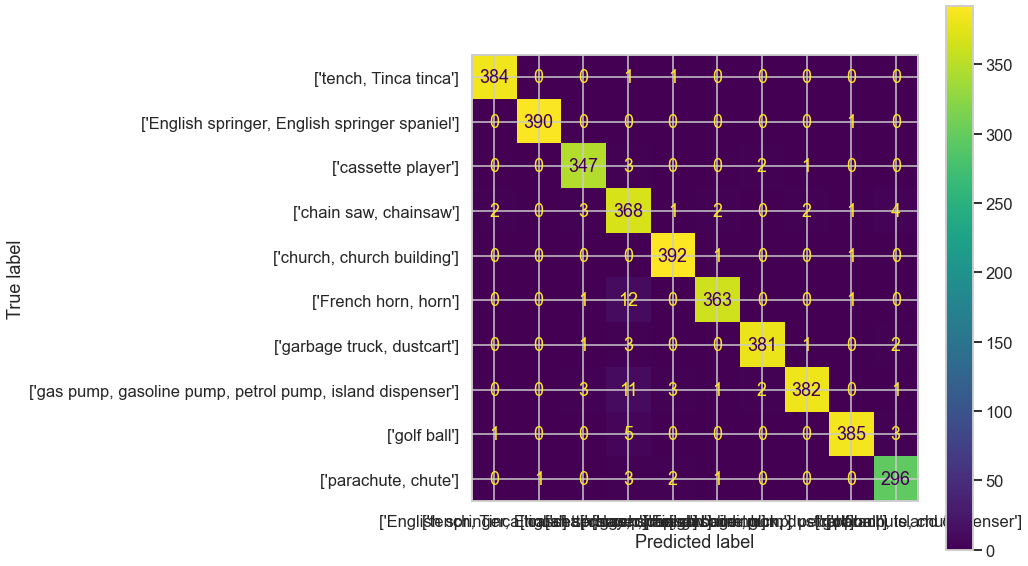

In [120]:
fig, ax = plt.subplots(figsize=(10,10))

confusion_out.plot(ax=ax)

In [ ]:
!python hyperparam_search.py

In [123]:

from scipy.stats import norm
from pprint import pprint
import time

In [ ]:
1

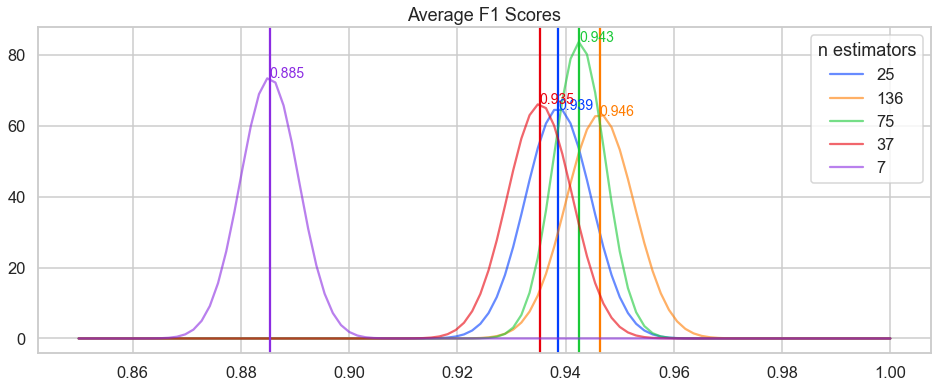

In [69]:
pipelinesults, best_index = take_n_best(results, 5)

#print_some_facts(top_results, best_index, tic, toc)
plot_some_results(top_results)

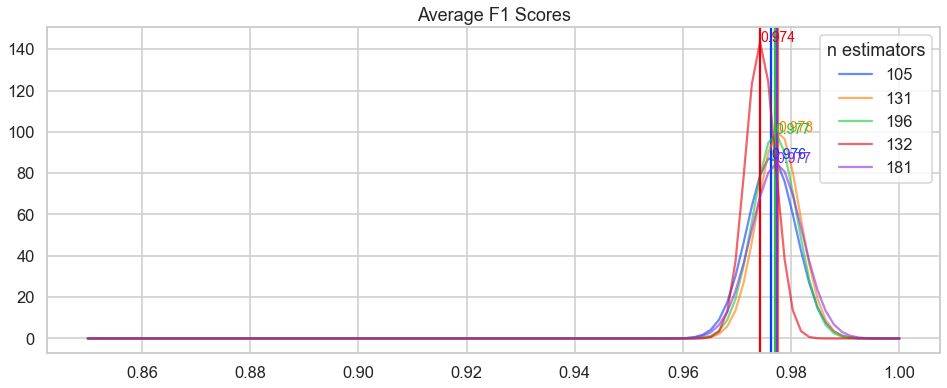

In [71]:
top_results, best_index = take_n_best(results, 5)

#print_some_facts(top_results, best_index, tic, toc)
plot_some_results(top_results)